In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://covidtracking.com/api/states/daily"
response = requests.get(url)

In [3]:
json = response.json()

In [4]:
response_df = pd.DataFrame(json)

In [5]:
response_df['graphing_date'] = [str(date) for date in response_df['date']]
response_df['graphing_date'] = [ date[4:6]+"-"+date[6:8] for date in response_df['graphing_date']]
response_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,graphing_date
0,20200715,AK,1631.0,154462.0,NaN,32.0,NaN,NaN,NaN,0.0,...,0,0,94f51a21cc1532dde7387df47013f567fb56d967,0,0,0,0,0,,07-15
1,20200715,AL,59067.0,481982.0,NaN,1362.0,7291.0,NaN,941.0,NaN,...,47,168,115a76b81b0c3c59d334b5de8180c2e10899dddc,0,0,0,0,0,,07-15
2,20200715,AR,30297.0,365479.0,NaN,458.0,1948.0,NaN,NaN,94.0,...,4,76,ce730ea246418cfcb8291076ec9ebfd46c643bfa,0,0,0,0,0,,07-15
3,20200715,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,4a0065a1c290d322d0dc631197c4e6cd8c714834,0,0,0,0,0,,07-15
4,20200715,AZ,131354.0,604608.0,NaN,3493.0,6103.0,929.0,NaN,671.0,...,97,161,cd92598667964b8af84aa921365c5bad41b04036,0,0,0,0,0,,07-15


In [6]:
response_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'graphing_date'],
      dtype='object')

In [7]:
response_df.describe()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
count,7.409000e+03,7394.000000,7.253000e+03,1006.000000,4790.000000,3853.000000,2454.000000,1027.000000,2150.000000,362.000000,...,7.409000e+03,7409.000000,7.409000e+03,7409.000000,7409.000000,7409.0,7409.0,7409.0,7409.0,7409.0
mean,2.020050e+07,23932.453882,2.187270e+05,1144.740557,946.402923,4787.000779,391.582722,702.838364,192.123721,180.450276,...,2.380056e+05,5738.950331,2.380056e+05,17.491564,36.375084,0.0,0.0,0.0,0.0,0.0
std,1.286741e+02,51605.623519,4.646430e+05,6070.220093,1843.222492,13297.644432,663.636910,609.371866,300.851315,116.609959,...,5.047972e+05,11594.855699,5.047972e+05,55.361857,281.757000,0.0,0.0,0.0,0.0,0.0
min,2.020012e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,...,0.000000e+00,-74189.000000,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0
25%,2.020041e+07,523.000000,9.900000e+03,14.000000,93.000000,266.000000,65.000000,195.000000,26.000000,101.250000,...,8.756000e+03,252.000000,8.756000e+03,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2.020051e+07,5314.000000,6.445800e+04,117.000000,369.000000,1180.000000,155.000000,526.000000,85.500000,146.000000,...,6.772000e+04,1816.000000,6.772000e+04,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.020061e+07,24165.500000,2.297390e+05,476.750000,908.000000,3817.000000,388.750000,1019.000000,205.000000,213.250000,...,2.485260e+05,6416.000000,2.485260e+05,14.000000,18.000000,0.0,0.0,0.0,0.0,0.0
max,2.020072e+07,404006.000000,5.445642e+06,64400.000000,18825.000000,89995.000000,5225.000000,2702.000000,2425.000000,514.000000,...,5.793276e+06,165227.000000,5.793276e+06,1877.000000,16373.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
positive_states = response_df[["graphing_date", "state", "positive", "recovered", "hospitalized", 'onVentilatorCurrently', "death", "total", "totalTestResults", 'graphing_date']]
positive_states

,graphing_date,state,positive,recovered,hospitalized,onVentilatorCurrently,death,total,totalTestResults,graphing_date
0,07-15,AK,1631.0,669.0,NaN,0.0,17.0,156093,156093,07-15
1,07-15,AL,59067.0,29736.0,7291.0,NaN,1211.0,541049,541049,07-15
2,07-15,AR,30297.0,23523.0,1948.0,94.0,335.0,395776,395776,07-15
3,07-15,AS,0.0,NaN,NaN,NaN,0.0,816,816,07-15
4,07-15,AZ,131354.0,16155.0,6103.0,671.0,2434.0,735962,735962,07-15
...,...,...,...,...,...,...,...,...,...,...
7404,01-26,WA,2.0,NaN,NaN,NaN,NaN,2,2,01-26
7405,01-25,WA,2.0,NaN,NaN,NaN,NaN,2,2,01-25
7406,01-24,WA,2.0,NaN,NaN,NaN,NaN,2,2,01-24
7407,01-23,WA,2.0,NaN,NaN,NaN,NaN,2,2,01-23


In [9]:
date_state_df = response_df[['date', 'positive', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'death']].groupby(['date']).sum()
date_state_df

,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death
date,,,,,
20200122,2.0,0.0,0.0,0.0,0.0
20200123,2.0,0.0,0.0,0.0,0.0
20200124,2.0,0.0,0.0,0.0,0.0
20200125,2.0,0.0,0.0,0.0,0.0
20200126,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200711,3230991.0,51798.0,5928.0,2169.0,127201.0
20200712,3291969.0,52578.0,5919.0,2182.0,127677.0
20200713,3350434.0,53921.0,6061.0,2259.0,128004.0


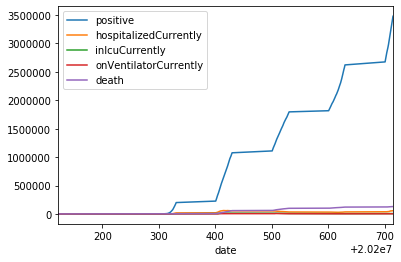

In [10]:
date_state_df.plot()

In [12]:
column_names = date_state_df.columns
rate_of_change_df = pd.DataFrame()
for column in column_names:
    rate_of_change_df[f"{column}_roc"] = date_state_df[f'{column}'].diff()
# rate_of_change_df = date_state_df.drop(columns=column_names)
rate_of_change_df

,positive_roc,hospitalizedCurrently_roc,inIcuCurrently_roc,onVentilatorCurrently_roc,death_roc
date,,,,,
20200122,NaN,NaN,NaN,NaN,NaN
20200123,0.0,0.0,0.0,0.0,0.0
20200124,0.0,0.0,0.0,0.0,0.0
20200125,0.0,0.0,0.0,0.0,0.0
20200126,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200711,63007.0,254.0,39.0,-28.0,757.0
20200712,60978.0,780.0,-9.0,13.0,476.0
20200713,58465.0,1343.0,142.0,77.0,327.0


In [13]:
date_state_df

,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death
date,,,,,
20200122,2.0,0.0,0.0,0.0,0.0
20200123,2.0,0.0,0.0,0.0,0.0
20200124,2.0,0.0,0.0,0.0,0.0
20200125,2.0,0.0,0.0,0.0,0.0
20200126,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20200711,3230991.0,51798.0,5928.0,2169.0,127201.0
20200712,3291969.0,52578.0,5919.0,2182.0,127677.0
20200713,3350434.0,53921.0,6061.0,2259.0,128004.0


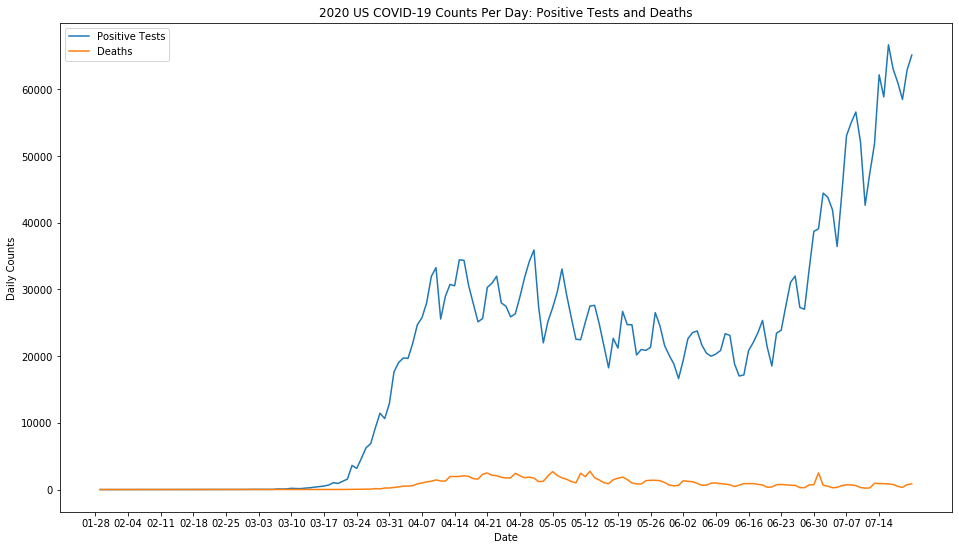

In [55]:
df = rate_of_change_df.reset_index()
x_pos, x, x_ticks = [], [], []
counter = 0
for ind, val in enumerate(df['date']):
    val = str(val)
    x_pos.append(ind)
    formatted_x = val[4:6]+'-'+val[6:8]
    x.append(formatted_x)
    if counter == 6:
        x_ticks.append(formatted_x)
        counter = 0
    else:
        counter += 1

positive = [value for value in df['positive_roc']]
deaths = [value for value in df['death_roc']]

plt.figure(figsize = (16, 9))
plt.plot(x_pos, positive, label='Positive Tests')
plt.plot(x_pos, deaths, label='Deaths')
plt.xticks(np.arange(min(x_pos), max(x_pos), 7), x_ticks)
plt.xlabel('Date')
plt.ylabel('Daily Counts')
plt.title('2020 US COVID-19 Counts Per Day: Positive Tests and Deaths')
plt.legend()
plt.show()

In [ ]:
date_dmv_df = response_df[['date', 'positive', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'death']].loc[response_df['state'].isin(['VA', 'DC', 'MD'])].groupby(['date']).sum()
date_dmv_df

In [ ]:
column_names = date_dmv_df.columns
for column in column_names:
    date_dmv_df[f"{column}_roc"] = date_dmv_df[f'{column}'].diff()
dmv_rate_of_change_df = date_dmv_df.drop(columns=column_names)
dmv_rate_of_change_df

In [ ]:
dmv_rate_of_change_df.plot()

In [ ]:
date_va_df = response_df[['date', 'positive', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'death']].loc[response_df['state'].isin(['VA'])].groupby(['date']).sum()
date_va_df
# column_names = date_va_df.columns
# for column in column_names:
#     date_va_df[f"{column}_roc"] = date_va_df[f'{column}'].diff()
# va_rate_of_change_df = date_va_df.drop(columns=column_names)
# va_rate_of_change_df
# va_rate_of_change_df.plot()

In [ ]:
date_va_df.plot()

In [ ]:
def plotROC(df):
    column_names = df.columns
    state_input = input('Add your state abbrev in caps')
    print(state_input)
    for column in column_names:
        df[f"{column}_roc"] = df[f'{column}'].diff()
    roc_df = df.drop(columns=column_names)
    return roc_df.plot()

In [ ]:
plotROC(date_va_df)

In [ ]:
date_va_df